*Performed on Google Colab*

**Importing the libraries**

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math

%matplotlib inline

In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers import Flatten, Dense
from tensorflow.python.keras.layers import Reshape

**Version of the tensorflow**

In [5]:
tf.__version__

'1.9.0-rc2'

**Importing the dataset**

In [7]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST',one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [8]:
print('Size of the training set: '+str(len(data.train.labels)))
print('Size of the test set: '+str(len(data.test.labels)))
print('Size of the validation set: '+str(len(data.validation.labels)))

Size of the training set: 55000
Size of the test set: 10000
Size of the validation set: 5000


In [0]:
data.test.cls = np.argmax(data.test.labels,axis=1)

**Data Dimensions**

In [0]:
img_size = 28
img_flat_size = img_size * img_size
img_shape = (img_size, img_size)
img_shape_full = (img_size, img_size, 1)

n_classes = 10
n_channels = 1

**Helper Function for plotting the images**

In [0]:
def plot_images(images,y_true,y_pred=None):
  assert len(images) == len(y_true) == 9
  
  fig, axes = plt.subplots(3,3)
  fig.subplots_adjust(hspace=0.5,wspace=0.5)
  
  for indx, ax in enumerate(axes.flat):
    ax.imshow(images[indx].reshape(img_shape),cmap=plt.cm.gray_r)
    
    if y_pred is None:
      xlabel = 'True ' + str(y_true[indx])
    else:
      xlabel = 'True ' + str(y_true[indx]) + ' Pred ' + str(y_pred[indx])
    
    ax.set_xlabel(xlabel)
    
    ax.set_xticks([])
    ax.set_yticks([])
    
  plt.show()

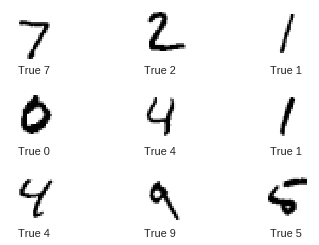

In [22]:
images = data.test.images[:9]
y_true = data.test.cls[:9]

plot_images(images,y_true)

**Helper Function for plotting example errors**

In [0]:
def plot_example_errors(y_pred):
  # y_pred.shape = (M,)
  incorrect = y_pred != data.test.cls
  
  correct_lbls = data.test.cls[incorrect]
  incorrect_lbls = y_pred[incorrect]
  images = data.test.images[incorrect]
  
  plot_images(images[:9],correct_lbls[:9],incorrect_lbls[:9])

**Sequential model**

In [0]:
model = Sequential()

model.add(InputLayer(input_shape=(img_flat_size,)))
model.add(Reshape(img_shape_full))
model.add(Conv2D(kernel_size=5,strides=1,padding='SAME',filters=16,activation='relu',name='conv_layer1'))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Conv2D(kernel_size=5,strides=1,padding='SAME',filters=36,activation='relu',name='conv_layer2'))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(n_classes,activation='softmax'))

**Model Compilation**

In [0]:
from tensorflow.python.keras.optimizers import Adam
optimizer = Adam(lr=1e-3)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

**Training**

In [34]:
model.fit(x=data.train.images,y=data.train.labels,epochs=2,batch_size=256)

Epoch 1/2
55000/55000 [==============================] - 68s 1ms/step - loss: 0.0729 - acc: 0.9783
Epoch 2/2
55000/55000 [==============================] - 68s 1ms/step - loss: 0.0495 - acc: 0.9850


**Evaluation**

In [36]:
results = model.evaluate(x=data.test.images,y =data.test.labels)

10000/10000 [==============================] - 6s 584us/step


In [45]:
for name, value in zip(model.metrics_names,results):
  print(name+' '+str(value))

loss 0.039344866575382186
acc 0.9866


**Prediction**

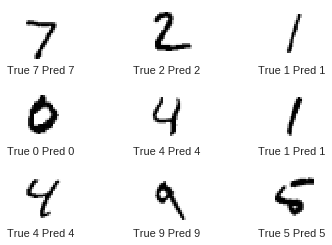

In [46]:
images = data.test.images[:9]
y_true = data.test.cls[:9]
y_pred = model.predict(x=images)
y_pred_cls = np.argmax(y_pred,axis=1)

plot_images(images,y_true,y_pred_cls)

**Mis-classified Images**

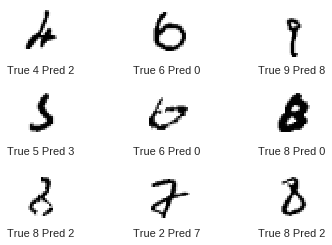

In [50]:
y_pred = model.predict(x=data.test.images)
y_pred_cls = np.argmax(y_pred,axis=1)

plot_example_errors(y_pred_cls)

**Functional Model**

In [0]:
inputs = Input(shape=(img_flat_size,))
input_layer = Reshape(img_shape_full)(inputs)
conv_layer1 = Conv2D(kernel_size=5,strides=1,filters=16,padding='SAME',activation='relu',name='conv_layer1')(input_layer)
pool_layer1 = MaxPooling2D(pool_size=2,strides=2)(conv_layer1)
conv_layer2 = Conv2D(kernel_size=5,strides=1,filters=36,padding='SAME',activation='relu',name='conv_layer2')(pool_layer1)
pool_layer2 = MaxPooling2D(pool_size=2,strides=2)(conv_layer2)
flattened = Flatten()(pool_layer2)
fc_1 = Dense(128,activation='relu')(flattened)
output_layer = Dense(n_classes,activation='softmax')(fc_1)

**Model Compilation**

In [0]:
from tensorflow.python.keras.models import Model

fun_model = Model(inputs=inputs,outputs=output_layer)
fun_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

**Training**

In [65]:
fun_model.fit(x=data.train.images,y=data.train.labels,batch_size=256,epochs=2)

Epoch 1/2
55000/55000 [==============================] - 68s 1ms/step - loss: 0.3337 - acc: 0.9016
Epoch 2/2
55000/55000 [==============================] - 68s 1ms/step - loss: 0.0803 - acc: 0.9754


**Evaluation**

In [66]:
results = fun_model.evaluate(x=data.test.images,y=data.test.labels)

10000/10000 [==============================] - 6s 593us/step


In [67]:
for name, value in zip(fun_model.metrics_names,results):
  print(name+' '+str(value))

loss 0.056536335194204
acc 0.9818


**Mis-classified Images**

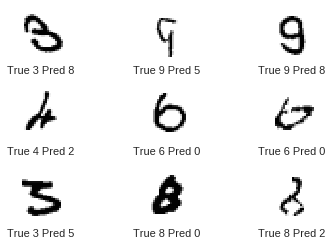

In [68]:
y_pred = fun_model.predict(x=data.test.images)
y_pred_cls = np.argmax(y_pred,axis=1)

plot_example_errors(y_pred_cls)

**Save and Load Model**

In [0]:
path = 'model.keras_digreg'
fun_model.save(path)
del fun_model

In [0]:
from tensorflow.python.keras.models import load_model
loaded_model = load_model(path)

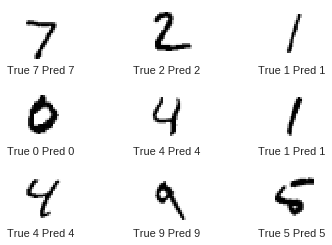

In [71]:
images = data.test.images[:9]
y_true = data.test.cls[:9]
y_pred = loaded_model.predict(x=images)
y_pred_cls = np.argmax(y_pred,axis=1)

plot_images(images,y_true,y_pred_cls)

In [72]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 784)               0         
_________________________________________________________________
reshape_6 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv_layer1 (Conv2D)         (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv_layer2 (Conv2D)         (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1764)              0         
__________

In [0]:
input_layer = loaded_model.layers[0]
conv_layer1 = loaded_model.layers[2]
conv_layer2 = loaded_model.layers[4]

In [83]:
conv1_weights = conv_layer1.get_weights()[0]
print(conv1_weights.shape)
conv1_baises = conv_layer1.get_weights()[1]
print(conv1_baises.shape)

(5, 5, 1, 16)
(16,)
